In [1]:
from sklearn.datasets import make_classification
from numpy import where
from matplotlib import pyplot
import numpy as np

import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay #Визуализация границ решений.

sns.set(rc={'figure.figsize':(15,8)})
from sklearn.linear_model import LogisticRegression, SGDClassifier 

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import log_loss, confusion_matrix, roc_auc_score, precision_score, f1_score, recall_score, accuracy_score, RocCurveDisplay, roc_curve,ConfusionMatrixDisplay, classification_report

import pandas as pd

In [4]:
X, y = make_classification(n_samples=110, n_features=20, n_informative=2)

In [5]:
X = X[:, [2, 3]]

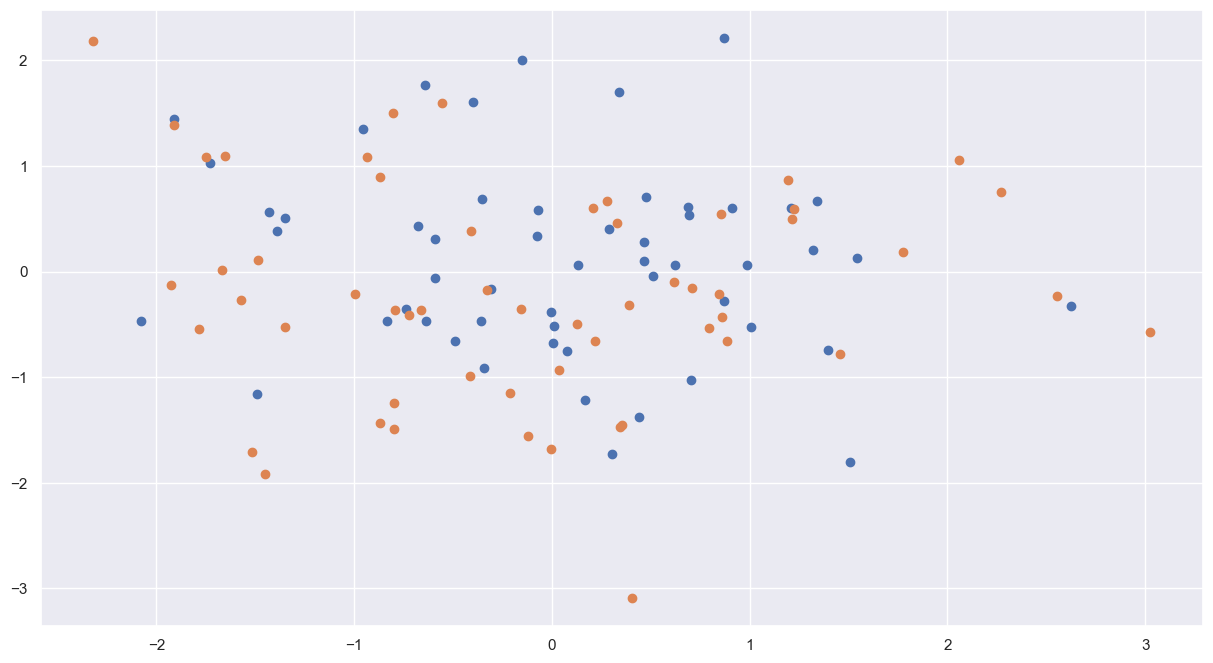

In [6]:
for class_value in range(2):
    # помещает на график точки из массива х(преврещенного в координаты (обрезанные до двух значений)), покрашенные массивоим у
    row_ix = where(y == class_value)
    # создать разброс этих образцов
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [7]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [8]:
y_pred = model.predict_proba(X)

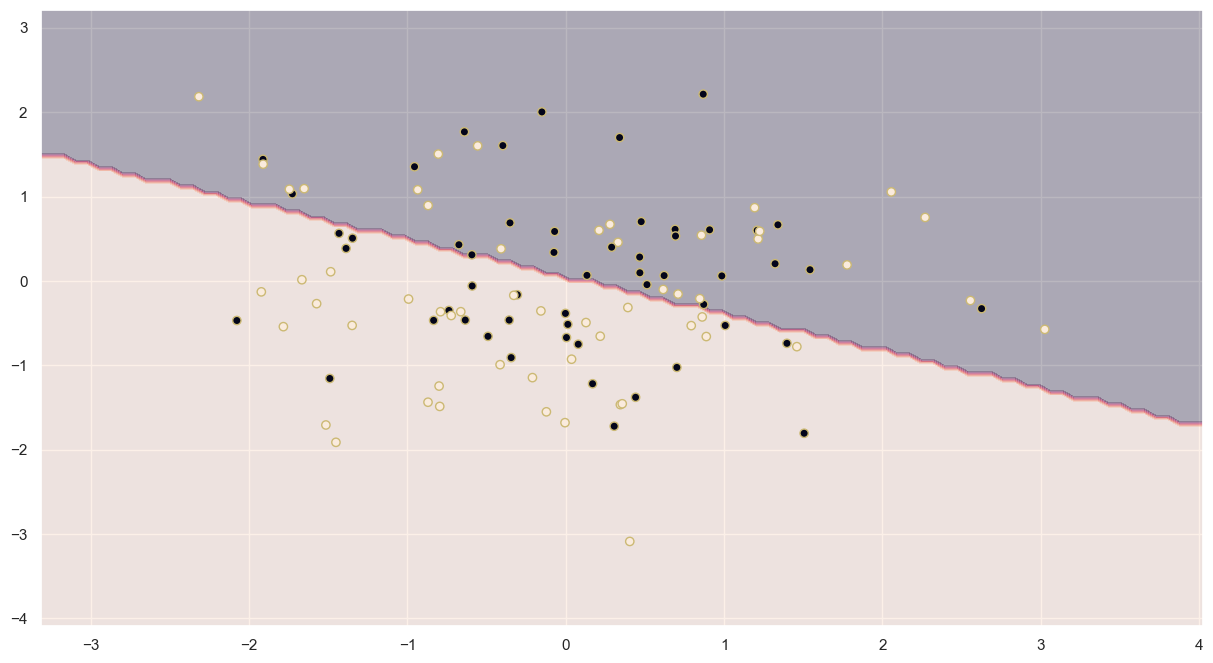

In [9]:
disp = DecisionBoundaryDisplay.from_estimator(
     model, X, response_method="predict",
     alpha=0.3
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="y")

In [10]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [11]:
y_pred = model.predict_proba(X)
log_loss(y, y_pred)

2.220446049250313e-16

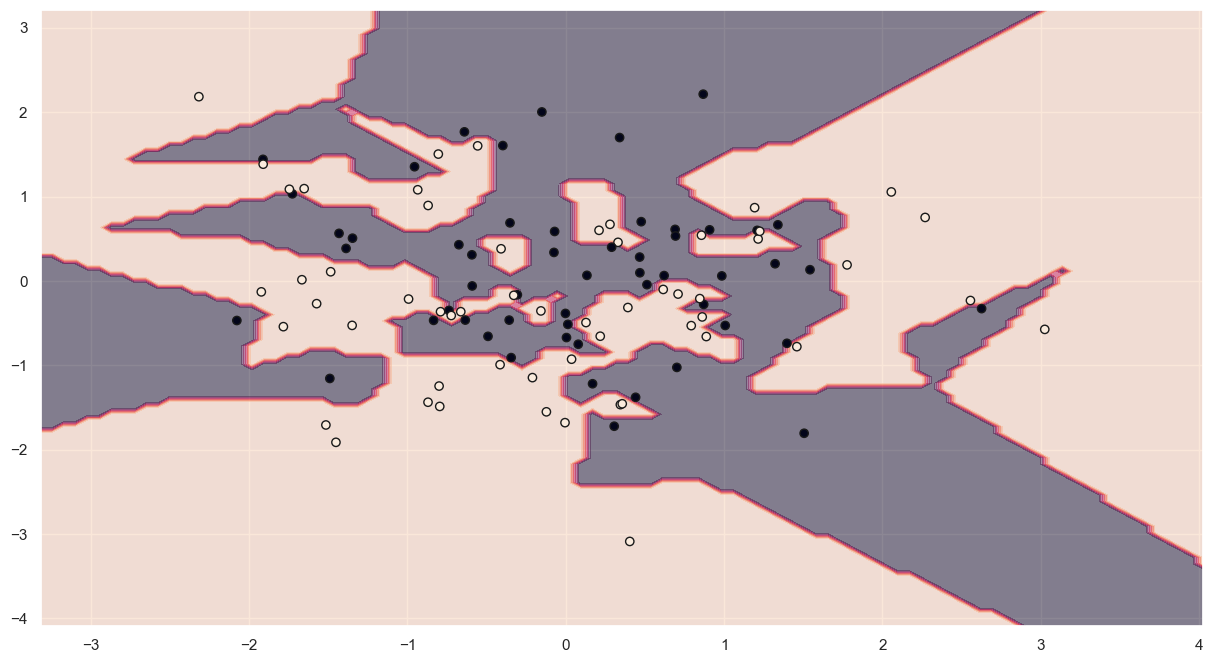

In [12]:
disp = DecisionBoundaryDisplay.from_estimator(
     model, X, response_method="predict",
     alpha=0.5
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

In [13]:
model = SVC(gamma='auto', kernel='poly',probability=True)
model.fit(X, y)

SVC(gamma='auto', kernel='poly', probability=True)

In [14]:
y_pred = model.predict_proba(X)
log_loss(y, y_pred)

0.6634068526993262

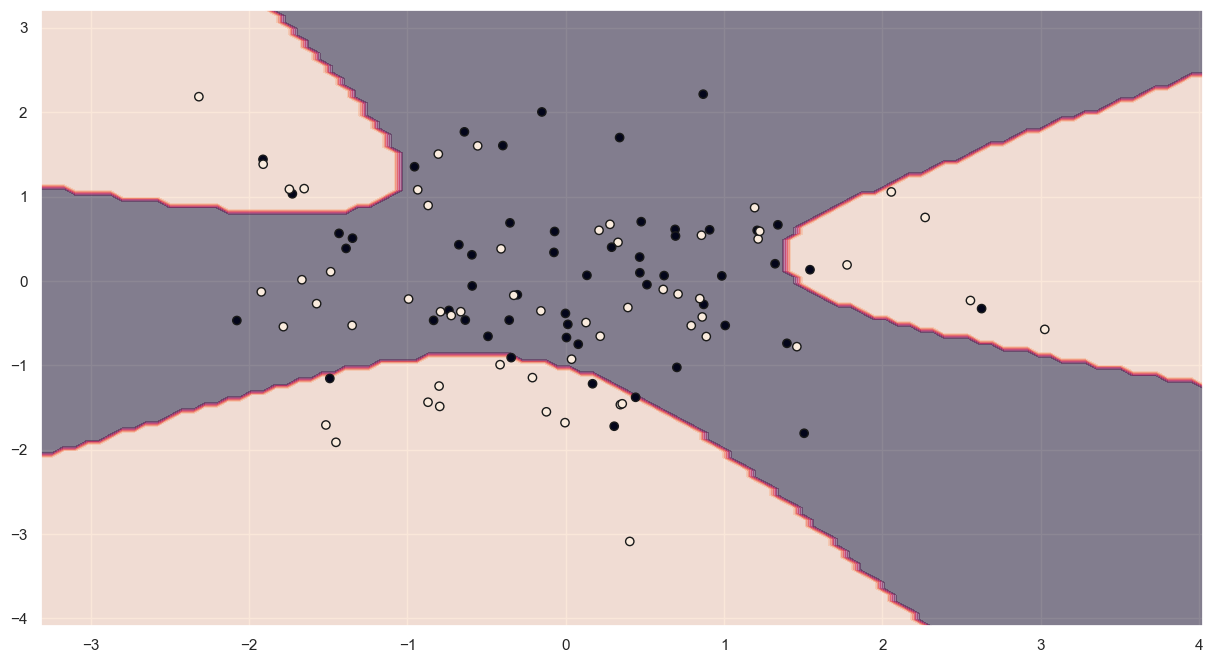

In [15]:
disp = DecisionBoundaryDisplay.from_estimator(
     model, X, response_method="predict",
     alpha=0.5
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

# Проанализируем датасет побольше

In [16]:
data= pd.read_csv('credit_score_prediction.csv')

In [17]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [18]:
data.shape

(20375, 28)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20375 entries, 0 to 20374
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20375 non-null  object 
 1   Customer_ID               20375 non-null  object 
 2   Month                     20375 non-null  object 
 3   Name                      18344 non-null  object 
 4   Age                       20375 non-null  object 
 5   SSN                       20375 non-null  object 
 6   Occupation                20375 non-null  object 
 7   Annual_Income             20375 non-null  object 
 8   Monthly_Inhand_Salary     17331 non-null  float64
 9   Num_Bank_Accounts         20375 non-null  int64  
 10  Num_Credit_Card           20375 non-null  int64  
 11  Interest_Rate             20375 non-null  int64  
 12  Num_of_Loan               20375 non-null  object 
 13  Type_of_Loan              18111 non-null  object 
 14  Delay_

In [20]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,17331.000000,20375.000000,20375.000000,20375.000000,20375.000000,19968.000000,20375.000000,20375.000000
mean,4289.714642,17.305816,23.896049,68.432000,21.101104,25.838241,32.283042,1382.614770
std,3223.009000,118.281240,134.473034,449.663675,14.669016,182.132454,5.145206,8197.669438
min,355.208333,0.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1661.064167,3.000000,4.000000,7.000000,10.000000,3.000000,27.990832,30.063049
50%,3177.560000,6.000000,6.000000,13.000000,18.000000,5.000000,32.312199,69.685459
75%,6114.540000,8.000000,7.000000,20.000000,28.000000,9.000000,36.527886,168.006686
max,14866.446667,1798.000000,1498.000000,5747.000000,67.000000,2594.000000,50.000000,82256.000000


In [21]:
data['Credit_Mix'] = data.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.replace('_', x[x != '_'].iloc[0] if any(x != '_') else '_'))

In [22]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [23]:
columns_to_drop = ['ID','Customer_ID','Name','SSN','Month','Occupation']
data = data.drop(columns=columns_to_drop, axis = 1)
data.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Обрабатываем Age

In [24]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce') 
data['Age'] = data['Age'].fillna(0).astype('int32')  

In [25]:
data['Age'].unique()

array([  23, -500,    0,   28,   34,   54,   55,   21,   31,   33, 7580,
         30,   24,   44,   45,   40,   41,   32,   35,   36,   39,   37,
        181,   20,   46,   26,   42,   19,   48,  995,   38, 5079,   43,
         22, 6409,   16, 7080,   18,  849, 3885,   15,   27,   25, 3052,
         14, 5342,   17, 4431, 2657,   47, 1032,  456, 5717,   53,   56,
       3169, 1191,   29, 7140,   49, 8233, 6955, 2534, 3115, 7657,   51,
         50, 5112, 6452, 2744, 1439, 5795, 4872, 1772, 1383, 5657,   52,
       1934, 8352, 3734, 2056, 7508, 2339, 8406, 1424, 6953, 5626, 4471,
        548,  769, 5490,  525, 4202, 3665, 4670, 3616, 6922, 6619, 1808,
       7992,  223, 1232, 4659, 6895,  395, 7099, 6048, 3936, 3512,  123,
       5639,  471, 7359, 4049, 5053, 2109, 7183, 5604, 1206, 6835, 4067,
       1812, 1170, 3625, 6354, 3724,  480, 5610, 4710, 4351, 5784, 3937,
       3542, 2239, 5645, 7425, 7851, 2027, 6306,  835, 3513, 6846, 6868,
       7805, 7274,  831, 8394, 2751,  783, 2455, 56

In [26]:
data['Age'].value_counts().sort_index(ascending=True)

Age
-500      178
 0       1014
 14       242
 15       297
 16       276
         ... 
 8632       1
 8639       1
 8655       1
 8662       1
 8674       1
Name: count, Length: 419, dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20375 entries, 0 to 20374
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       20375 non-null  int32  
 1   Annual_Income             20375 non-null  object 
 2   Monthly_Inhand_Salary     17331 non-null  float64
 3   Num_Bank_Accounts         20375 non-null  int64  
 4   Num_Credit_Card           20375 non-null  int64  
 5   Interest_Rate             20375 non-null  int64  
 6   Num_of_Loan               20375 non-null  object 
 7   Type_of_Loan              18111 non-null  object 
 8   Delay_from_due_date       20375 non-null  int64  
 9   Num_of_Delayed_Payment    18943 non-null  object 
 10  Changed_Credit_Limit      20375 non-null  object 
 11  Num_Credit_Inquiries      19968 non-null  float64
 12  Credit_Mix                20375 non-null  object 
 13  Outstanding_Debt          20375 non-null  object 
 14  Credit

In [28]:
data = data[(data['Age']>0) & (data['Age']<=100)]
data['Age'].unique()

array([23, 28, 34, 54, 55, 21, 31, 33, 30, 24, 44, 45, 40, 41, 32, 35, 36,
       39, 37, 20, 46, 26, 42, 19, 48, 38, 43, 22, 16, 18, 15, 27, 25, 14,
       17, 47, 53, 56, 29, 49, 51, 50, 52])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18799 entries, 0 to 20374
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18799 non-null  int32  
 1   Annual_Income             18799 non-null  object 
 2   Monthly_Inhand_Salary     15989 non-null  float64
 3   Num_Bank_Accounts         18799 non-null  int64  
 4   Num_Credit_Card           18799 non-null  int64  
 5   Interest_Rate             18799 non-null  int64  
 6   Num_of_Loan               18799 non-null  object 
 7   Type_of_Loan              16723 non-null  object 
 8   Delay_from_due_date       18799 non-null  int64  
 9   Num_of_Delayed_Payment    17469 non-null  object 
 10  Changed_Credit_Limit      18799 non-null  object 
 11  Num_Credit_Inquiries      18417 non-null  float64
 12  Credit_Mix                18799 non-null  object 
 13  Outstanding_Debt          18799 non-null  object 
 14  Credit_Util

# Обрабатываем Annual income

In [30]:
data['Annual_Income'] = data['Annual_Income'].str.rstrip("_")

# Обрабатываем Number of Bank Accounts

In [31]:
data['Num_Bank_Accounts'].value_counts().head(10)

Num_Bank_Accounts
8     2638
6     2612
7     2373
5     2249
3     2177
4     1967
10     942
9      938
1      926
2      881
Name: count, dtype: int64

In [32]:
data = data[(data['Num_Bank_Accounts'] >= 0) & (data['Num_Bank_Accounts'] <= 20)]

# Обрабатываем Number of Credit Card

In [33]:
data['Num_Credit_Card'].value_counts().head(10)

Num_Credit_Card
5     3395
6     3228
7     3095
4     2489
3     2479
8      931
9      831
10     825
1      411
2      407
Name: count, dtype: int64

In [34]:
data = data[(data['Num_Credit_Card'] >= 0) & (data['Num_Credit_Card'] <= 15)]

# Обрабатываем Number of loans

In [35]:
data['Num_of_Loan'] = data['Num_of_Loan'].str.rstrip("_")

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18104 entries, 0 to 20374
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18104 non-null  int32  
 1   Annual_Income             18104 non-null  object 
 2   Monthly_Inhand_Salary     15401 non-null  float64
 3   Num_Bank_Accounts         18104 non-null  int64  
 4   Num_Credit_Card           18104 non-null  int64  
 5   Interest_Rate             18104 non-null  int64  
 6   Num_of_Loan               18104 non-null  object 
 7   Type_of_Loan              16113 non-null  object 
 8   Delay_from_due_date       18104 non-null  int64  
 9   Num_of_Delayed_Payment    16826 non-null  object 
 10  Changed_Credit_Limit      18104 non-null  object 
 11  Num_Credit_Inquiries      17739 non-null  float64
 12  Credit_Mix                18104 non-null  object 
 13  Outstanding_Debt          18104 non-null  object 
 14  Credit_Util

In [37]:
data['Num_of_Loan'].value_counts().head(10)

Num_of_Loan
3       2888
2       2862
4       2790
0       1919
1       1698
6       1457
7       1319
5       1186
9        667
-100     654
Name: count, dtype: int64

In [38]:
data['Num_of_Loan'] = pd.to_numeric(data['Num_of_Loan'], errors='coerce')
data = data[(data['Num_of_Loan'] >= 0) & (data['Num_of_Loan'] <= 10)]

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17373 entries, 0 to 20374
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17373 non-null  int32  
 1   Annual_Income             17373 non-null  object 
 2   Monthly_Inhand_Salary     14781 non-null  float64
 3   Num_Bank_Accounts         17373 non-null  int64  
 4   Num_Credit_Card           17373 non-null  int64  
 5   Interest_Rate             17373 non-null  int64  
 6   Num_of_Loan               17373 non-null  int64  
 7   Type_of_Loan              15454 non-null  object 
 8   Delay_from_due_date       17373 non-null  int64  
 9   Num_of_Delayed_Payment    16152 non-null  object 
 10  Changed_Credit_Limit      17373 non-null  object 
 11  Num_Credit_Inquiries      17022 non-null  float64
 12  Credit_Mix                17373 non-null  object 
 13  Outstanding_Debt          17373 non-null  object 
 14  Credit_Util

# Обрабатываем Type of Loan

In [40]:
data['Type_of_Loan'] = data['Type_of_Loan'].fillna('Not Specified')

In [41]:
data['Type_of_Loan'].value_counts().head(30)

Type_of_Loan
Not Specified                                    2160
Credit-Builder Loan                               199
Home Equity Loan                                  193
Personal Loan                                     193
Mortgage Loan                                     191
Debt Consolidation Loan                           184
Payday Loan                                       177
Student Loan                                      170
Auto Loan                                         150
Payday Loan, and Not Specified                     82
Personal Loan, and Student Loan                    77
Mortgage Loan, and Home Equity Loan                73
Debt Consolidation Loan, and Home Equity Loan      66
Mortgage Loan, and Mortgage Loan                   65
Credit-Builder Loan, and Not Specified             64
Payday Loan, and Debt Consolidation Loan           61
Mortgage Loan, and Personal Loan                   58
Payday Loan, and Auto Loan                         56
Student Loan, a

In [42]:
data['Type_of_Loan'] = data['Type_of_Loan'].str.replace('and', ',', regex=False).str.strip()

loan_dummies = data['Type_of_Loan'].str.get_dummies(sep=', ')

print(loan_dummies.columns)

Index(['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 'Payday Loan',
       'Personal Loan', 'Student Loan'],
      dtype='object')


In [43]:
data = pd.concat([data, loan_dummies], axis=1)
data = data.loc[:, ~data.columns.duplicated()]
data = data.loc[:, data.columns != '']
data = data.drop("Type_of_Loan", axis=1)

print(data.columns)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'],
      dtype='object')


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17373 entries, 0 to 20374
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17373 non-null  int32  
 1   Annual_Income             17373 non-null  object 
 2   Monthly_Inhand_Salary     14781 non-null  float64
 3   Num_Bank_Accounts         17373 non-null  int64  
 4   Num_Credit_Card           17373 non-null  int64  
 5   Interest_Rate             17373 non-null  int64  
 6   Num_of_Loan               17373 non-null  int64  
 7   Delay_from_due_date       17373 non-null  int64  
 8   Num_of_Delayed_Payment    16152 non-null  object 
 9   Changed_Credit_Limit      17373 non-null  object 
 10  Num_Credit_Inquiries      17022 non-null  float64
 11  Credit_Mix                17373 non-null  object 
 12  Outstanding_Debt          17373 non-null  object 
 13  Credit_Utilization_Ratio  17373 non-null  float64
 14  Credit_Hist

# Обрабатываем Num_of_Delayed_Payment

In [45]:
data['Num_of_Delayed_Payment'].value_counts().head(30)

Num_of_Delayed_Payment
16     956
17     923
20     922
15     887
19     871
12     866
18     850
8      845
10     825
9      791
11     780
14     753
13     718
21     461
7      395
22     389
5      376
6      365
3      363
0      319
2      317
23     316
24     288
4      274
1      271
25     236
-1      59
26      57
-2      38
17_     37
Name: count, dtype: int64

In [46]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.rstrip("_")
data['Num_of_Delayed_Payment'] = pd.to_numeric(data['Num_of_Delayed_Payment'], errors='coerce')
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].fillna(0).astype('int32') 

data = data[(data['Num_of_Delayed_Payment'] >= 0)]

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17256 entries, 0 to 20374
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17256 non-null  int32  
 1   Annual_Income             17256 non-null  object 
 2   Monthly_Inhand_Salary     14681 non-null  float64
 3   Num_Bank_Accounts         17256 non-null  int64  
 4   Num_Credit_Card           17256 non-null  int64  
 5   Interest_Rate             17256 non-null  int64  
 6   Num_of_Loan               17256 non-null  int64  
 7   Delay_from_due_date       17256 non-null  int64  
 8   Num_of_Delayed_Payment    17256 non-null  int32  
 9   Changed_Credit_Limit      17256 non-null  object 
 10  Num_Credit_Inquiries      16908 non-null  float64
 11  Credit_Mix                17256 non-null  object 
 12  Outstanding_Debt          17256 non-null  object 
 13  Credit_Utilization_Ratio  17256 non-null  float64
 14  Credit_Hist

# Обрабатываем Changed_Credit_Limit

In [48]:
data['Changed_Credit_Limit'].value_counts().head(10)

Changed_Credit_Limit
_        354
11.63     40
0.8       39
8.12      39
11.04     35
8.69      33
10.06     33
10.2      33
7.23      32
8.22      31
Name: count, dtype: int64

In [49]:
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].replace("_",np.nan)

# Обрабатываем Changed_Credit_Limit

In [50]:
data['Credit_Mix'].value_counts().head(30)

Credit_Mix
Standard    7894
Good        5247
Bad         4115
Name: count, dtype: int64

In [51]:
data['Credit_Mix'] = data['Credit_Mix'].replace("_",np.nan)
data['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

# Обрабатываем Credit_History_Age

In [52]:
data['Credit_History_Age'].value_counts().head(10)

Credit_History_Age
18 Years and 4 Months     90
17 Years and 9 Months     87
18 Years and 10 Months    85
19 Years and 4 Months     84
18 Years and 5 Months     81
18 Years and 2 Months     80
18 Years and 9 Months     80
18 Years and 3 Months     79
17 Years and 10 Months    79
15 Years and 8 Months     79
Name: count, dtype: int64

In [53]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta

# Функция для преобразования текста в количество месяцев
def convert_to_months(value):
    if pd.isna(value):
        return np.nan
    # Разбиваем текст на годы и месяцы
    parts = value.split(" and ")
    years = 0
    months = 0

    for part in parts:
        if 'Year' in part:
            years = int(part.split()[0])
        elif 'Month' in part:
            months = int(part.split()[0])
    
    # Находим количество месяцев
    total_months = years * 12 + months
    return total_months

# Применим функцию к столбцу 'Credit_History_Age'
data['Credit_History_Age_Months'] = data['Credit_History_Age'].apply(convert_to_months)

# Проверим результаты
data[['Credit_History_Age', 'Credit_History_Age_Months']].head()

,Credit_History_Age,Credit_History_Age_Months
0,22 Years and 1 Months,265.0
1,NaN,NaN
3,22 Years and 4 Months,268.0
4,22 Years and 5 Months,269.0
5,22 Years and 6 Months,270.0


In [54]:
data = data.drop(['Credit_History_Age'], axis=1)
data.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_History_Age_Months
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,1,1,0,1,0,0,0,1,0,265.0
1,23,19114.12,NaN,3,4,3,4,-1,0,11.27,...,1,1,0,1,0,0,0,1,0,NaN
3,23,19114.12,NaN,3,4,3,4,5,4,6.27,...,1,1,0,1,0,0,0,1,0,268.0
4,23,19114.12,1824.843333,3,4,3,4,6,0,11.27,...,1,1,0,1,0,0,0,1,0,269.0
5,23,19114.12,NaN,3,4,3,4,8,4,9.27,...,1,1,0,1,0,0,0,1,0,270.0


# Обрабатываем Payment_of_Min_Amount

In [55]:
data['Payment_of_Min_Amount'].value_counts().head(10)

Payment_of_Min_Amount
Yes    9114
No     6079
NM     2063
Name: count, dtype: int64

# Обрабатываем Amount_invested_monthly

In [56]:
data['Amount_invested_monthly'].value_counts().head(10)

Amount_invested_monthly
__10000__             729
0.0                    27
80.41529543900253       1
59.334530673565254      1
101.02123048877355      1
46.038344297455495      1
67.16298963163018       1
64.25010304840413       1
145.71149245622712      1
801.393412650321        1
Name: count, dtype: int64

In [57]:
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].replace('__10000__',np.nan)

# Обрабатываем Payment_Behaviour

In [58]:
data['Payment_Behaviour'].value_counts().head(10)

Payment_Behaviour
Low_spent_Small_value_payments      4370
High_spent_Medium_value_payments    3036
Low_spent_Medium_value_payments     2472
High_spent_Large_value_payments     2343
High_spent_Small_value_payments     1993
Low_spent_Large_value_payments      1784
!@9#%8                              1257
High                                   1
Name: count, dtype: int64

In [59]:
data['Payment_Behaviour'] = data['Payment_Behaviour'].replace('!@9#%8',np.nan)

# Обрабатываем Monthly_Balance

In [60]:
data['Monthly_Balance'].value_counts().head(10)

Monthly_Balance
312.49408867943663    1
418.2399344119799     1
225.99373413607327    1
58.78319870768622     1
693.8580563958058     1
471.9107405185919     1
631.5761679776854     1
521.1156760111598     1
174.54231761837457    1
537.3424873163199     1
Name: count, dtype: int64

In [61]:
data['Monthly_Balance'] = data['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)

# Переводим в численные значения

In [62]:
import pandas as pd

# Listy kolumn do konwersji
columns_to_float = ['Annual_Income','Monthly_Inhand_Salary', 'Changed_Credit_Limit', 
                    'Num_Credit_Inquiries', 'Outstanding_Debt', 
                    'Credit_Utilization_Ratio', 'Total_EMI_per_month', 
                    'Amount_invested_monthly','Monthly_Balance']

columns_to_int = ['Num_Bank_Accounts', 'Delay_from_due_date', 'Credit_History_Age_Months', 'Age', 'Num_of_Delayed_Payment']

# Konwersja kolumn do float
for column in columns_to_float:
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Umożliwia konwersję wartości
    data[column] = data[column].fillna(0).astype('float64')  # Używamy float32 dla wartości zmiennoprzecinkowych

# Konwersja kolumn do int
for column in columns_to_int:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    data[column] = data[column].fillna(0).astype('int64')  # Upewniamy się, że NaN jest zamieniane na 0

# Проверим типы данных после преобразования
print(data[columns_to_float + columns_to_int].dtypes)

Annual_Income                float64
Monthly_Inhand_Salary        float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Monthly_Balance              float64
Num_Bank_Accounts              int64
Delay_from_due_date            int64
Credit_History_Age_Months      int64
Age                            int64
Num_of_Delayed_Payment         int64
dtype: object


# Обрабатываем null значения

In [63]:
missing_count = data.isnull().sum()
value_count = data.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_data = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_data

,count,percentage
Age,0,0.00
Annual_Income,0,0.00
Monthly_Inhand_Salary,0,0.00
Num_Bank_Accounts,0,0.00
Num_Credit_Card,0,0.00
Interest_Rate,0,0.00
Num_of_Loan,0,0.00
Delay_from_due_date,0,0.00
Num_of_Delayed_Payment,0,0.00
Changed_Credit_Limit,0,0.00


In [64]:
data = data.dropna(subset=['Payment_Behaviour'])

missing_count = data.isnull().sum()
value_count = data.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_data = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})

missing_data

,count,percentage
Age,0,0.00
Annual_Income,0,0.00
Monthly_Inhand_Salary,0,0.00
Num_Bank_Accounts,0,0.00
Num_Credit_Card,0,0.00
Interest_Rate,0,0.00
Num_of_Loan,0,0.00
Delay_from_due_date,0,0.00
Num_of_Delayed_Payment,0,0.00
Changed_Credit_Limit,0,0.00


# Обрабатываем категориальные значения

In [65]:
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].map({'Yes': 2, 'No': 1, 'NM': 0})

data['Payment_of_Min_Amount'] = pd.to_numeric(data['Payment_of_Min_Amount'], downcast='integer')

In [66]:
data['Credit_Mix'] = data['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

data['Credit_Mix'] = pd.to_numeric(data['Credit_Mix'], downcast='integer')

In [67]:
payment_behaviour_mapping = {
    'Low_spent_Small_value_payments': 1,
    'Low_spent_Medium_value_payments': 2,
    'Low_spent_Large_value_payments': 3,
    'High_spent_Small_value_payments': 4,
    'High_spent_Medium_value_payments': 5,
    'High_spent_Large_value_payments': 6
}

data['Payment_Behaviour_encoded'] = data['Payment_Behaviour'].map(payment_behaviour_mapping)
data['Payment_Behaviour_encoded'] = pd.to_numeric(data['Payment_Behaviour_encoded'], downcast='integer')

print(data[['Payment_Behaviour', 'Payment_Behaviour_encoded']].head())

                  Payment_Behaviour  Payment_Behaviour_encoded
0   High_spent_Small_value_payments                        4.0
1    Low_spent_Large_value_payments                        3.0
3    Low_spent_Small_value_payments                        1.0
4  High_spent_Medium_value_payments                        5.0
6    Low_spent_Small_value_payments                        1.0


In [68]:
data = data.drop("Payment_Behaviour", axis=1)
data = data.rename(columns={'Not Specified': 'Not Specified Loan'})

columns = data.columns.tolist()  # Przekształcenie indeksu kolumn w listę
columns.append(columns.pop(columns.index('Credit_Score')))  # Przeniesienie kolumny na koniec
# Ponowne przypisanie zaktualizowanej kolejności kolumn
# Переназначение обновленного порядка столбцов
data = data[columns]

print(data.columns)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'Not Specified Loan',
       'Payday Loan', 'Personal Loan', 'Student Loan',
       'Credit_History_Age_Months', 'Payment_Behaviour_encoded',
       'Credit_Score'],
      dtype='object')


In [69]:
columns_to_change = ['Credit_Mix','Payment_Behaviour_encoded','Payment_of_Min_Amount']
data[columns_to_change] = data[columns_to_change].fillna(0).astype('int64')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15999 entries, 0 to 20374
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        15999 non-null  int64  
 1   Annual_Income              15999 non-null  float64
 2   Monthly_Inhand_Salary      15999 non-null  float64
 3   Num_Bank_Accounts          15999 non-null  int64  
 4   Num_Credit_Card            15999 non-null  int64  
 5   Interest_Rate              15999 non-null  int64  
 6   Num_of_Loan                15999 non-null  int64  
 7   Delay_from_due_date        15999 non-null  int64  
 8   Num_of_Delayed_Payment     15999 non-null  int64  
 9   Changed_Credit_Limit       15999 non-null  float64
 10  Num_Credit_Inquiries       15999 non-null  float64
 11  Credit_Mix                 15999 non-null  int64  
 12  Outstanding_Debt           15999 non-null  float64
 13  Credit_Utilization_Ratio   15999 non-null  float64


In [71]:
data['Credit_Score'] = data['Credit_Score'].replace({'Poor': 0, 'Good': 1})

In [72]:
print(data.isna().sum())

Age                          0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Monthly_Balance              0
Auto Loan                    0
Credit-Builder Loan          0
Debt Consolidation Loan      0
Home Equity Loan             0
Mortgage Loan                0
Not Specified Loan           0
Payday Loan                  0
Personal Loan                0
Student Loan                 0
Credit_History_Age_Months    0
Payment_Behaviour_encoded    0
Credit_Score                 1
dtype: int64


In [73]:
data = data.dropna()

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15998 entries, 0 to 20371
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        15998 non-null  int64  
 1   Annual_Income              15998 non-null  float64
 2   Monthly_Inhand_Salary      15998 non-null  float64
 3   Num_Bank_Accounts          15998 non-null  int64  
 4   Num_Credit_Card            15998 non-null  int64  
 5   Interest_Rate              15998 non-null  int64  
 6   Num_of_Loan                15998 non-null  int64  
 7   Delay_from_due_date        15998 non-null  int64  
 8   Num_of_Delayed_Payment     15998 non-null  int64  
 9   Changed_Credit_Limit       15998 non-null  float64
 10  Num_Credit_Inquiries       15998 non-null  float64
 11  Credit_Mix                 15998 non-null  int64  
 12  Outstanding_Debt           15998 non-null  float64
 13  Credit_Utilization_Ratio   15998 non-null  float64


# Построение моделей

In [75]:
y = data['Credit_Score']
X = data.drop('Credit_Score', axis=1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [77]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5280 entries, 410 to 10837
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        5280 non-null   int64  
 1   Annual_Income              5280 non-null   float64
 2   Monthly_Inhand_Salary      5280 non-null   float64
 3   Num_Bank_Accounts          5280 non-null   int64  
 4   Num_Credit_Card            5280 non-null   int64  
 5   Interest_Rate              5280 non-null   int64  
 6   Num_of_Loan                5280 non-null   int64  
 7   Delay_from_due_date        5280 non-null   int64  
 8   Num_of_Delayed_Payment     5280 non-null   int64  
 9   Changed_Credit_Limit       5280 non-null   float64
 10  Num_Credit_Inquiries       5280 non-null   float64
 11  Credit_Mix                 5280 non-null   int64  
 12  Outstanding_Debt           5280 non-null   float64
 13  Credit_Utilization_Ratio   5280 non-null   float64

In [78]:
y_test.head()

410      0.0
2727     0.0
3199     1.0
658      0.0
10494    1.0
Name: Credit_Score, dtype: float64

# Начнем с логистической регрессии

In [79]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
y_pred = model.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred)

0.8244318181818182

Метрика accuracy (правильность классификации) – это один из самых простых и часто используемых способов измерения того, насколько хорошо модель справляется с задачей. Он измеряет долю правильных предсказаний модели среди всех предсказаний.

В библиотеке scikit-learn за расчёт метрики accuracy отвечает функция accuracy_score(), которая имеет следующий синтаксис:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

Параметры функции accuracy_score():
1) y_true - список реальных меток, истинные значения классов
2) y_pred - список предсказанных значений
3) normalize - если тру, возвращает долю правильных предскзаний, если фолс возвращает абсолютное количество правильных предсказаний
4) sample_weight - массив весов для каждого примера, позволяет задать разный вес примерам. если none, все примеры имеют одинаковый вес. массив должен быть такой же длины как и y_true и y_pred

Предположим, у вас есть 10 сообщений. Из них 6 – это не спам (реальные классы: 0), а 4 – спам (реальные классы: 1). Вы сделали предсказания с помощью модели, и они выглядят так:

Реальные метки:   0, 0, 1, 1, 0, 0, 1, 0, 0, 1
Предсказания:     0, 0, 0, 1, 0, 1, 1, 0, 0, 0
Теперь считаем, сколько раз предсказания совпали с реальными метками:

Нулевая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Первая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Вторая позиция: реальный класс – 1, предсказание – 0 (промах).
Третья позиция: реальный класс – 1, предсказание – 1 (совпадение).
Четвертая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Пятая позиция: реальный класс – 0, предсказание – 1 (промах).
Шестая позиция: реальный класс – 1, предсказание – 1 (совпадение).
Седьмая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Восьмая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Девятая позиция: реальный класс – 1, предсказание – 0 (промах).
Из 10 предсказаний 7 были правильными. Так что accuracy будет равно:



In [82]:
roc_auc_score(y_test,y_pred)

0.5070364678091346

В машинном обучение очень важны метрики оценки эффективности моделей. Среди таких метрик есть: кривые ROC и показатель AUC. Они позволяют оценивать бинарные классификаторы.

Кривая ROC – это график, который иллюстрирует производительность классификационной модели при всех возможных порогах классификации. Ось X данного графика представляет собой FPR, т.е ложноположительную частоту, а ось Y — TRP, т.е истинноположительную частоту.

Оценка качества модели через расчет площади под ROC кривой, используя roc_auc_score:

AUC ROC (площадь под кривой ошибок)


In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      4363
         1.0       0.40      0.02      0.04       917

    accuracy                           0.82      5280
   macro avg       0.61      0.51      0.47      5280
weighted avg       0.75      0.82      0.75      5280



In [84]:
confusion_matrix(y_test, y_pred)

array([[4334,   29],
       [ 898,   19]], dtype=int64)

Одним из самых наиболее развёрнутых способов оценки качества классификации является применение матрицы ошибок. Матрица ошибок представляет собой квадратную таблицу, в которой отображается количество предсказанных и фактических классов для классификационной модели. В этой матрице строки представляют истинные классы (реальные метки), а столбцы представляют предсказанные классы (метки, которые предсказала модель). Размер матрицы соответствует количеству классов.

фактический отрицательный класс TN  FP  
фактический положительный класс FN  TP
                спрогнозированный   спрогнозированный  
                    отрицательный   положительный
                            класс   класс

где:

TP (True Positive) — истинно положительные примеры;
TN (True Negative) — истинно отрицательные примеры;
FP (False Positive) — ложноположительные примеры;
FN (False Negative) — ложноотрицательные примеры.


В статистике ложноположительный пример (FP) называют ошибкой I рода, а ложноотрицательный (FN) – ошибкой II рода.

Допустим у нас имеется список с истинными метками классов y_true и список с предсказанными моделью метками классов y_pred.

y_true = [0, 1, 0, 0, 1, 0, 1, 1, 0]  
y_pred = [0, 0, 0, 0, 1, 0, 1, 1, 0] 

Объявив 1 положительным классом, а 0 – отрицательным классом, мы можем рассмотреть элементы матрицы ошибок в терминах истинно положительных (True Positive), истинно отрицательных (True Negative), ложноположительных (False Positive) и ложноотрицательных (False Negative) примеров.

В этом случае, матрица ошибок будет иметь следующий вид:

5  0

1  3

Давайте определимся, какие числа в данной матрице являются истинно/ложноположительными и истинно/ложноотрицательными. В этом вопросе отталкиваться нужно от спрогнозированного класса. Например, если спрогнозировали 0, то значит мы предсказали отрицательный класс (отрицательный – потому что изначально класс 0, мы объявили отрицательным классом (Negative), а класс 1 – положительным (Positive)).

Модель правильно (True) предсказала 0 (Negative) в 5 случаях – значит TN=5.
Модель неправильно (False) предсказала 0 (Negative) в 1 случае – значит FN=1.
Модель правильно (True) предсказала 1 (Positive) в 3 случаях – значит TP=3.
Модель неправильно (False) предсказала 1 (Positive) в 0 случаев – значит FP=0.
Элементы главной диагонали (от верхнего левого до нижнего правого угла) представляют правильно классифицированные образцы. Чем больше значения на диагонали, тем лучше модель справляется с классификацией этих классов.

В библиотеке scikit-learn за создание матрицы ошибок отвечает функция confusion_matrix(), которая имеет следующий синтаксис:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

Параметры функции confusion_matrix():
1) y_true - истинные метки классов
2) y_pred - предсказанные метки классов
3) labels - список уникальных классов. если не указано, классы будут извлечены из y_true и y_pred. порядок классов в матрице соответствует порядку этих меток
4) sample_weight - массив весов для каждой выборки. если не указан, все выборки считаются равновесными
5) normalize - опция для нормализации ошибок. "true": нормализация по истинным меткам (каждая строка будет делиться на сумму строки). "pred": нормализация по предсказанным меткам (каждый столбец будет делиться на сумму столбца). "all": нормализация по всем элементам матрицы (каждый элемент будет делиться на общую сумму). Если указано None, матрица останется ненормализованной.

In [85]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)

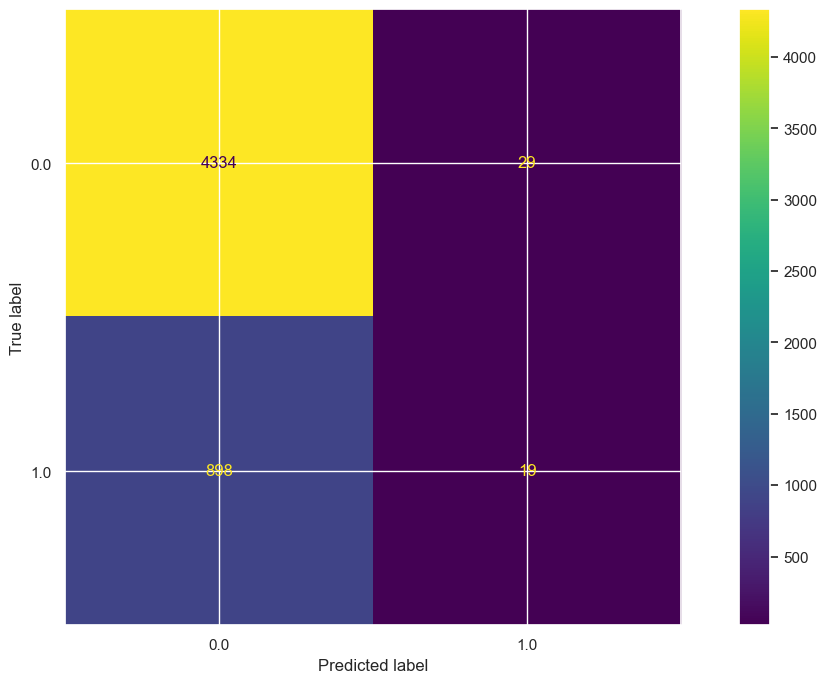

In [86]:
disp.plot()

In [87]:
y_test_proba = model.predict_proba(X_test)[:, -1]

In [88]:
y_test_proba

array([0.01819599, 0.13769496, 0.14278292, ..., 0.14783081, 0.03128058,
       0.4715079 ])

# Проверим KNN

In [89]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [90]:
y_pred = model.predict(X_test)

c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\subp

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      4363
         1.0       0.47      0.10      0.17       917

    accuracy                           0.82      5280
   macro avg       0.65      0.54      0.53      5280
weighted avg       0.77      0.82      0.77      5280



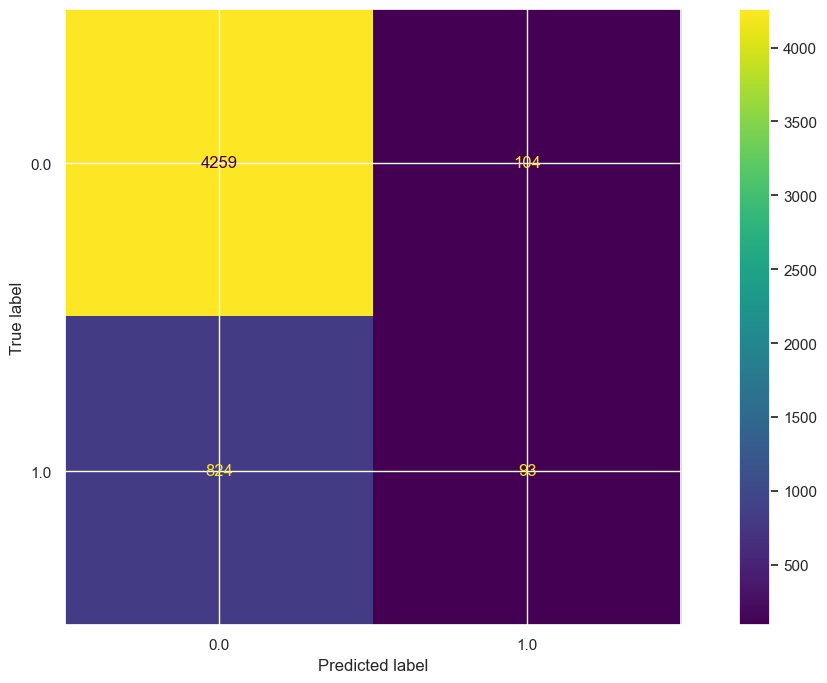

In [92]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()

# Проверим SVC

In [95]:
model = SVC(gamma='auto', kernel='poly',probability=True)
#model.fit(X, y)

In [ ]:
X_train_subset = X_train.iloc[:500, [2, 3]]  # Используем только первые 500 строк для теста
y_train_subset = y_train.iloc[:500]

model.fit(X_train_subset, y_train_subset)

In [ ]:
from sklearn.svm import SVC
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train.iloc[:, [2, 3]], y_train)

In [96]:
X_train.shape

(10718, 29)

In [97]:
X_train.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified Loan,Payday Loan,Personal Loan,Student Loan,Credit_History_Age_Months,Payment_Behaviour_encoded
6140,22,82093.52,6574.126667,8,5,6,4,3,11,0.00,...,0,1,0,1,0,1,0,0,240,6
4614,25,50552.34,0.000000,8,7,17,1,30,12,13.42,...,0,0,1,0,0,0,0,0,393,1
16574,33,78738.68,6583.556667,9,7,29,2,47,20,8.38,...,0,0,0,1,0,0,0,0,0,2
1818,51,38175.39,3287.282500,1,2,7,3,1,8,11.81,...,0,1,0,0,0,0,1,0,335,5
11477,27,41415.52,0.000000,6,5,31,5,26,20,22.50,...,1,0,1,1,0,0,0,1,234,5


In [ ]:
y_pred = model.predict(X_test.iloc[:, [2, 3]])

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()

# SGDC

In [93]:
model = SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier()

In [94]:
y_pred = model.predict(X_test)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      4363
         1.0       0.30      0.10      0.15       917

    accuracy                           0.80      5280
   macro avg       0.57      0.53      0.52      5280
weighted avg       0.74      0.80      0.76      5280



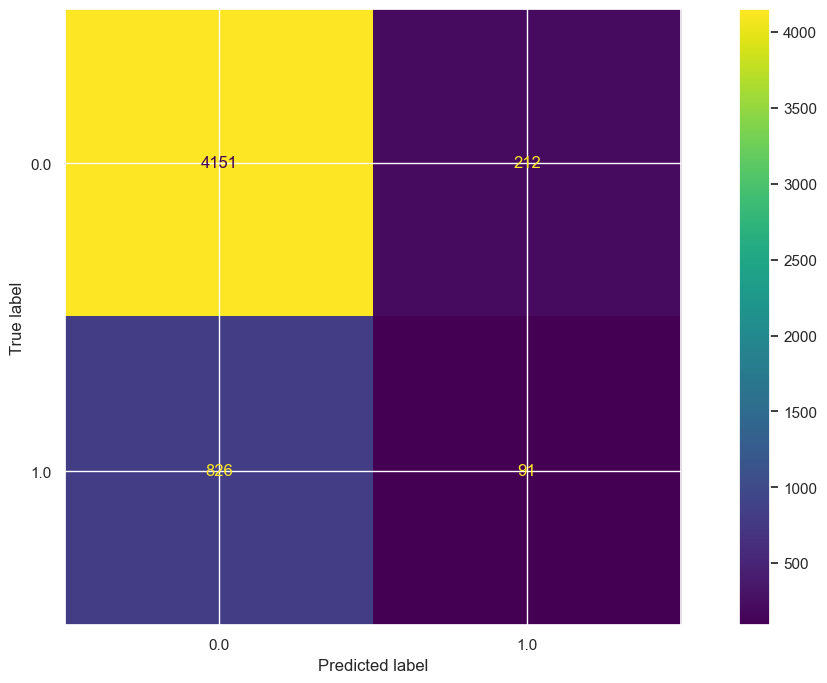

In [96]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()

In [97]:
from sklearn.decomposition import PCA

Метод главных компонент (англ. principal component analysis, PCA) — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. Альтернативно суть PCA можно определить как линейное проецирование, минимизирующее среднеквадратичное расстояние между исходными точками и их проекциями.

Изначально матрица признаков обязательно центрируется, чтобы первая главная компонента могла соответствовать направлению максимальной вариации данных, а не просто их среднему значению. Обычно нахождение главных компонент сводится к двум основным методам:

* Вычисление собственных векторов и собственных значений ковариационной матрицы данных. Поскольку ковариационная матрица отражает степень линейной связи между различными переменными, то собственные вектора этой матрицы будут задавать направления, вдоль которых дисперсия данных максимальна, а собственные значения — величину этой дисперсии. Собственное значение, соответствующее собственному вектору, характеризует вклад этого вектора в объяснение дисперсии данных и чем больше собственное значение, тем значимее главная компонента. Обычно отбираются только те главные компоненты, которые объясняют заданный уровень дисперсии, например, 95%.

* Вычисление сингулярного разложения матрицы данных. Сингулярное разложение — это способ представления любой матрицы в виде произведения трёх других матриц: левой сингулярной матрицы U, диагональной матрицы сингулярных значений S и правой сингулярной матрицы V, где сингулярные значения — это квадратные корни собственных значений ковариационной матрицы данных (именно для этого в данном случае выполняется предварительное центрирование данных), правая сингулярная матрица V будет соответствовать собственным векторам ковариационной матрицы данных, а левая U будет являться проекцией исходных данных на главные компоненты, определённые матрицей V. Таким образом, сингулярное разложение также позволяет выделить главные компоненты, но без необходимости в вычислении ковариационной матрицы. Помимо того, что такое решение более эффективно, оно считается более численно стабильным, поскольку не требует вычисления ковариационной матрицы напрямую, которая может быть плохо обусловлена в случае сильной корреляции признаков. Именно данный подход используется в реализации scikit-learn

Параметр n_components указывает на количество измерений, на которые будет производиться проекция, то есть до скольки измерений мы хотим снизить наш датасет.

In [98]:
pca = PCA(n_components=7)

In [99]:
pcaX = pca.fit_transform(X)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(pcaX, y, test_size=0.33)

In [101]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [102]:
y_pred = model.predict(X_test)

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.49      0.65      4359
         1.0       0.26      0.86      0.40       921

    accuracy                           0.56      5280
   macro avg       0.60      0.68      0.53      5280
weighted avg       0.83      0.56      0.60      5280



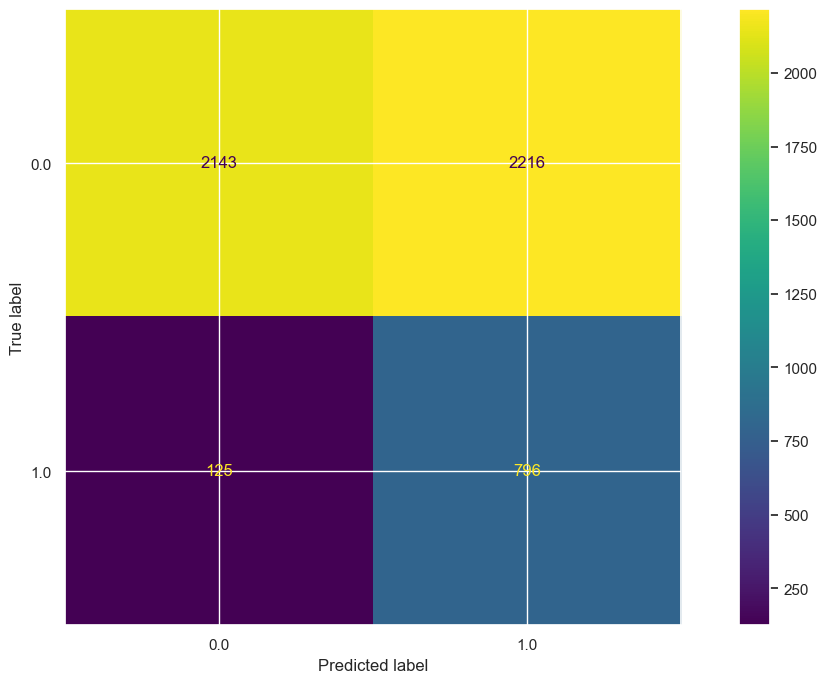

In [104]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()